# En este análisis de set de datos de vinos rojos analizaremos el comportamiento de los datos e intentaremos ajustar un modelo que describa algún fenómeno.

In [2]:
library(nortest)
library(car)
library(lmtest)
library(ggplot2)
library(corrplot)
library(ggpubr)
library(Hmisc)
library(DMwR)
library(lme4)

In [3]:
(redWineDataSet <- read.table('winequality-red.csv', header = TRUE, sep = ";"))

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


In [4]:
attach(redWineDataSet)

In [5]:
names(redWineDataSet)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

In [6]:
nrow(redWineDataSet)

[1] 1599

#### Crearemos ahora nuestro primer modelo, este asumimos que será la primera visualización de los coeficientes resultantes, con el cual, mas adelante, podremos validar y contrastar otros modelos.

In [7]:
(modeloRed_I <- lm(quality ~ ., data = redWineDataSet))


Call:
lm(formula = quality ~ ., data = redWineDataSet)

Coefficients:
         (Intercept)         fixed.acidity      volatile.acidity  
           21.965208              0.024991             -1.083590  
         citric.acid        residual.sugar             chlorides  
           -0.182564              0.016331             -1.874225  
 free.sulfur.dioxide  total.sulfur.dioxide               density  
            0.004361             -0.003265            -17.881164  
                  pH             sulphates               alcohol  
           -0.413653              0.916334              0.276198  


##### Intercepto = $\beta_0$ + fixed.acidity = $\beta_1$ + volatile.acidity = $\beta_2$ + citric.acid = $\beta_3$ + residual.sugar = $\beta_4$ + chlorides $\beta_5$ + free.sulfur.dioxide = $\beta_6$ + total.sulfur.dioxide = $\beta_7$ + density = $\beta_8$ + pH = $\beta_8$ + sulphates = $\beta_9$ + alcohol = $\beta_10$
##### $Y_i = 21.96 + 0.024 X_1 - 1.083 X_2 - 0.182 X_3 + 0.016 X_4 - 1.87 X_5 + 0.0043 X_5 - 0.0032 X_6 - 17.881 X_7 - 0.413 X_8 + 0.916 X_9 + 0.276 X_10$

##### Aunque tengamos este primer modelo, deberemos validar el cumplimiento de los supuestos, esto hará que descartemos un conjunto de variables, las cuales no representarán significación para el modelo, los supuestos a validar son los siguientes:
- No correlación, es decir, los factores son lo más independientes entre sí
- Los residuales asumen una distribución normal
- Los residuales poseen Homocedasticidad, i.e. tienen vaianza finita y constante
- Media igual a cero
- Linealidad en las variables

##### Para ello recurrireos a herramientas gráficas y analíticas (tests de hipótesis) para corroborar dichos supuestos

#### Para validar la significancia de las variales independientes, se realiza una prueba T, donde las probabilidades muy chiquitas serán rechazadas puesto que no caeran en la zona delimitada al 95% de confianza. 
#### Otro punto que podemos resaltar es el Error Estandar Residual se nota bajo, sin embargo no tenemos contra qué contrastar su resultado. Buscaré generar otro modelo encontrando las variables más significativas para el modelo, para ello antes validaré si existe correlación entre las variables, así podré contrastar nuestro error estandar residual. Ahora bien, se observa un coeficiente de determinación un tanto alto, sin embargo debemos mantener presente dos puntos importantes:
- El coeficiente de determinación es una medida de bondad de ajuste que describe la variabilidad en los datos
- NO es una medida del todo confiable, puesto que dicha medida puede ser inexacta a la hora de incremntar el número de variables (aunque éstas no sean significativas), ésta se podrá ver inflada aparentando un incremento significativo en ella y engañando al lector de su precisión.
- El objetivo principal es indicar una relación lineal
- Toma valores de [0, 1]
- Es una medida simétrica
- Con esta medida nos podremos dar cuenta que existe multicolinealidad cuando el coeficiente es muy alto y no existen variables (factores) significativas

#### Ecuación de Coeficiente de determinación: $$p^2 = 1 - \frac{\sigma^2_r}{\sigma^2}$$
#### Las pruebas que muestra la función summary() del modelo lineal, son las siguientes:
- La estimación de la variable
- El error estándar de la estimación
- El valor T de la prueba T
- La probabilidad que se obtiene de la prueba T, ésta por lo tanto entre más chiquita sea más significativa es, dada su Hipótesis nula es que posee una distribución T (distribución normal), si la pendiente de una regresión lineal difiere estadísticamente de cero.

#### Aquí podemos notar que muy probablemente exista multicolinealidad entre las variables factores, ya que el coeficiente de determinación se considera alto para el primer acercamiento con el modelo saturado, ya que existen variables muy poco significativas, esto crea la necesidad de realizar una matriz de correlación y ver si existe correlación fuerte entre variables independientes.

In [8]:
summary(modeloRed_I)


Call:
lm(formula = quality ~ ., data = redWineDataSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68911 -0.36652 -0.04699  0.45202  2.02498 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.197e+01  2.119e+01   1.036   0.3002    
fixed.acidity         2.499e-02  2.595e-02   0.963   0.3357    
volatile.acidity     -1.084e+00  1.211e-01  -8.948  < 2e-16 ***
citric.acid          -1.826e-01  1.472e-01  -1.240   0.2150    
residual.sugar        1.633e-02  1.500e-02   1.089   0.2765    
chlorides            -1.874e+00  4.193e-01  -4.470 8.37e-06 ***
free.sulfur.dioxide   4.361e-03  2.171e-03   2.009   0.0447 *  
total.sulfur.dioxide -3.265e-03  7.287e-04  -4.480 8.00e-06 ***
density              -1.788e+01  2.163e+01  -0.827   0.4086    
pH                   -4.137e-01  1.916e-01  -2.159   0.0310 *  
sulphates             9.163e-01  1.143e-01   8.014 2.13e-15 ***
alcohol               2.762e-01  2.648e-02  10.429  < 2e-

#### Ahora pintaremos nuestra matriz de coeficientes de correlación de Pearson, debemos considerar lo siguinete:
- La diagonal con correlación perfecta [1] las cuales son las variables correlacionadas consigo mismas
- El resto oscilará entre [-1, 1] el grado de relación positiva o negativa con las demás variables, en el caso de la relación negativa será inversamente proporcional, y en el caso de la relación positiva directamente proporcional
- La NO correlación será igual a [0]

##### El coeficiente de correlación te dice la relación lineal entre una variable y la otra, toma valores de [-1, 1]

In [9]:
(redWineDataSet.cor <- round(cor(redWineDataSet, method = 'pearson', use = "pairwise.complete.obs"), digits = 2))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile.acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric.acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual.sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free.sulfur.dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total.sulfur.dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


##### De primer vistazo y aparentemente, las variables con alto coeficiente de correlación y que muy probablemente, pueden estár causando la presencia de multicolinealidad en nuestro modelo son las siguientes:
- citric.acid con fixed.acidity con correlación positiva alta de 0.67
- citric.acid con volatile.acidity con correlación negativa alta de -0.55
- density con fixed.acidity con correlación positiva alta de 0.67
- pH con fixed.acidity con correlación positiva alta -0.68
- total.sulfur.dioxide con free.sulfur.dioxide con correlación positiva alta de 0.67

##### Ahora vamos a corroborar correlación por medio de nuestra prueba de hipótesis (ver abajo la matriz de p-values) la cual supone no correlación, i.e. nuestra $H_0:$ no existe correlación, por lo tanto nuestra $\rho = 0$
##### El p-valor de cualquier prueba de hipotesis te dice con que tanta fuerza rechazas $H_0$
##### Valores de p muy cercanos a cero rechazan $H_0$

In [10]:
pValuesCorrelations <- rcorr(as.matrix(redWineDataSet, use = "pairwise.complete.obs"))
round(pValuesCorrelations$P,digits = 5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,NA,0.00000,0.00000,0.00000,0.00018,0.00000,0.00001,0.00000,0.00000,0.00000,0.01365,0.00000
volatile.acidity,0.00000,NA,0.00000,0.93892,0.01422,0.67470,0.00221,0.37876,0.00000,0.00000,0.00000,0.00000
citric.acid,0.00000,0.00000,NA,0.00000,0.00000,0.01474,0.15555,0.00000,0.00000,0.00000,0.00001,0.00000
residual.sugar,0.00000,0.93892,0.00000,NA,0.02617,0.00000,0.00000,0.00000,0.00061,0.82521,0.09258,0.58322
chlorides,0.00018,0.01422,0.00000,0.02617,NA,0.82412,0.05809,0.00000,0.00000,0.00000,0.00000,0.00000
free.sulfur.dioxide,0.00000,0.67470,0.01474,0.00000,0.82412,NA,0.00000,0.38050,0.00487,0.03888,0.00549,0.04283
total.sulfur.dioxide,0.00001,0.00221,0.15555,0.00000,0.05809,0.00000,NA,0.00435,0.00782,0.08602,0.00000,0.00000
density,0.00000,0.37876,0.00000,0.00000,0.00000,0.38050,0.00435,NA,0.00000,0.00000,0.00000,0.00000
pH,0.00000,0.00000,0.00000,0.00061,0.00000,0.00487,0.00782,0.00000,NA,0.00000,0.00000,0.02096
sulphates,0.00000,0.00000,0.00000,0.82521,0.00000,0.03888,0.08602,0.00000,0.00000,NA,0.00018,0.00000


#### Por lo que podemos concluir después de nuestra matriz de pruebas de hipótesis de Pearson, se plantea una hipótesis nula donde nuestro coeficiente de correlación es = 0, por lo tanto dicha prueba genera la probabilidad de que nuestro coeficiente tenga ese valor, en los casos que denotamos arriba, podemos ver que efectivamente en todos los propuestos existe correlación, y guiádonos en el coeficiente de correlación que obtuvimos; es alta la correlación. Por lo tanto, rechazamos $H_0$ ya que nuestro p-valor es 0 < $\alpha = 0.05$. Y dado que nuestra $H_0$ plantea independencia entre variables, concluimos que sí son dependientes.
#### Por lo tanto, debemos decidir cuales son las variables que debemos remover de nuestro modelo saturado, sin embargo no podemos quitarlas sin medir antes el impacto de ello, para eso existen métodos de selección de variables que veremos en el desarrollo de este proyecto.

##### Existe también, una herramienta muy util para que de manera visual observemos si existe colinealidad, ya sea positiva o negativa, la función corrplot() recibe como parámetro el set de datos con la matriz de correlación, he decidido dejar esto así, ya que es mucho más visual y podemos analizar la correlación para observar colinealidad como herramienta adicional.

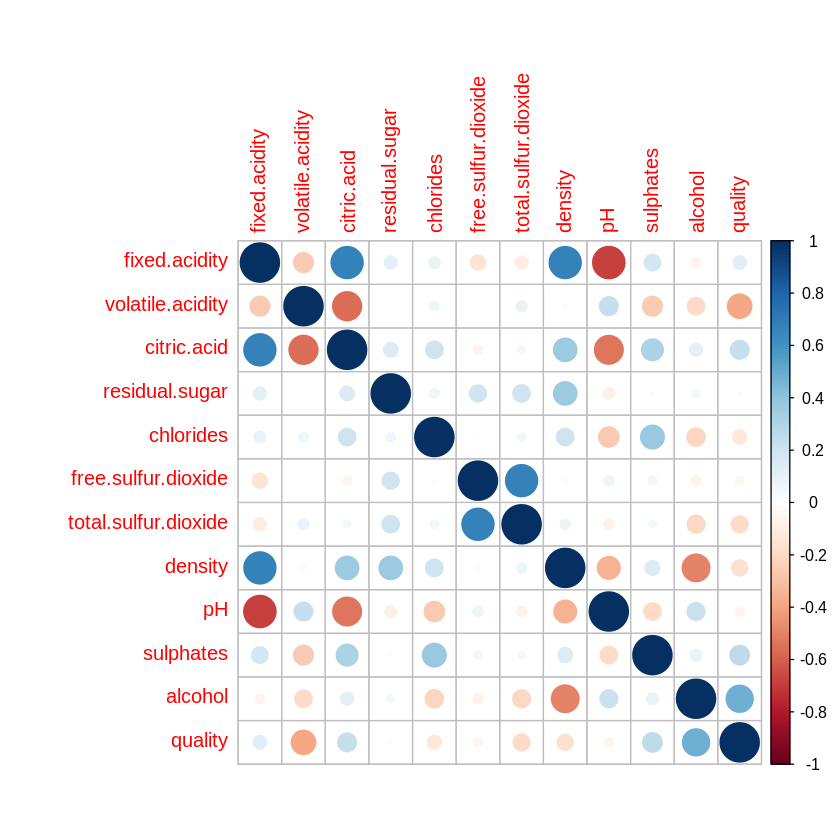

In [11]:
corrplot(redWineDataSet.cor)

#### También podemos observar en esta matriz de plots las relciones lineales que pueden presentar las distintas variables, son pocas las que tienen una relación lineal, en realidad si notamos, la variable quality no posee una relación lineal con ninguna de las demás variables, puesto que esta variable es categorica ordinal.

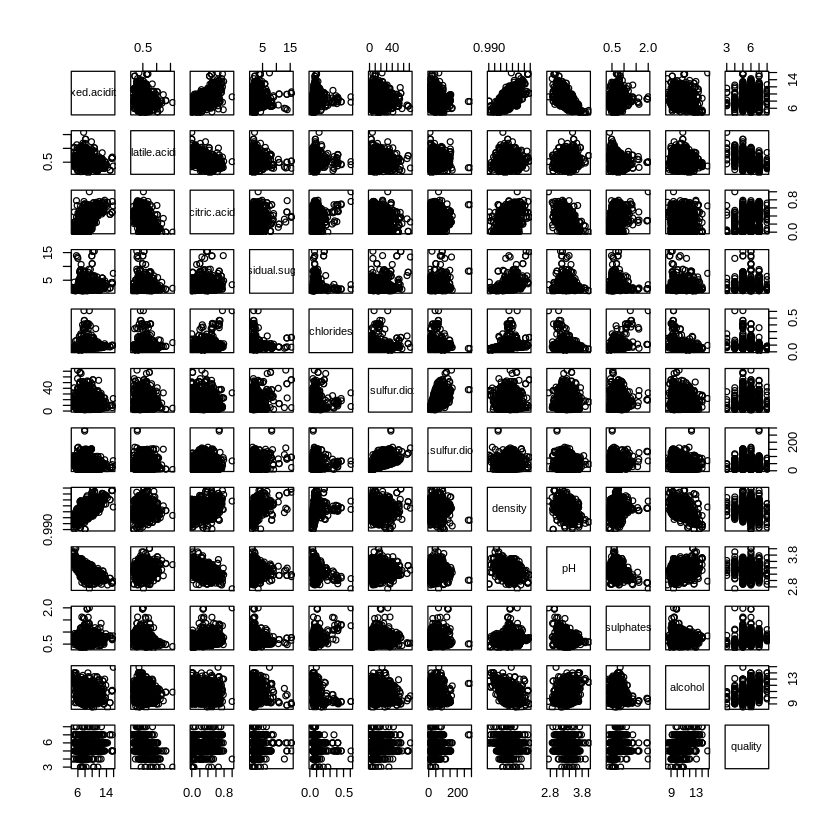

In [12]:
plot(redWineDataSet)

#### Revisaremos ahora si existe normalidad en la distribución de los residuales que generan la regresión, evidentemente, podemos asumir que esto no se cumplirá del todo dado los dos siguientes puntos:
- Los datos no poseen la misma escala, por lo tanto debemos normalizarlos para que posean la misma y tener un contraste mucho más efectivo
- Los residuales a contrastar en la prueba provienen de la regresión del modelo saturado, esto puede generar cierta imprecisión, debido a que no se ha seleccionado las variables disginificativas para el modelo aún.

##### Se ha decidido realizar la prueba de normalidad de Anderson-Darling normality test, esto se debe al tamaño de la muestra que probaremos, cuando la cantidad de datos es alta, se recomienda usar dicho test ya que es mucho más sensible a colas pesadas.

In [13]:
res = residuals(modeloRed_I)

In [14]:
norm = pnorm(res, mean = mean(res), sd = sd(res))

#### La prueba de Anderson-Darling se usa para evaluar si una muestra de datos provino de una población con una distribución específica, la $H_0$ plantea que la distribución de la muestra es normal, por lo tanto al comprarar la distribución de nuestros errores, partimos con el supuesto de normalidad.

##### Las hipótesis dadas siguen ésta regla:
- $H_0:$ los residuales siguen una distribución normal
- $H_a:$ los residuales no siguen una distribución normal

##### Podemos determinar que sí nuestro p-value es menor que una $\alpha = 0.05$ la hipótesis se rechazará, de lo contrario diremos que aún no existe evidencia suficiente para rechazar $H_0$

##### Por lo tanto rechazaremos $H_0$ debido a nuestro p-value resultante, el cual es mucho menor que $\alpha$
##### NOTA IMPORTANTE: Lo curioso está en observar como el histograma pudiera aparentar una distribución normal o muy similar a ella, sin embargo la prueba de hipótesis ha hablado!

In [16]:
(testAD_I <- ad.test(norm))


	Anderson-Darling normality test

data:  norm
A = 16.396, p-value < 2.2e-16


In [17]:
testAD_I$p < 0.895 / (sqrt(nrow(redWineDataSet))-0.01 + (0.85/sqrt(nrow(redWineDataSet))))

[1] TRUE

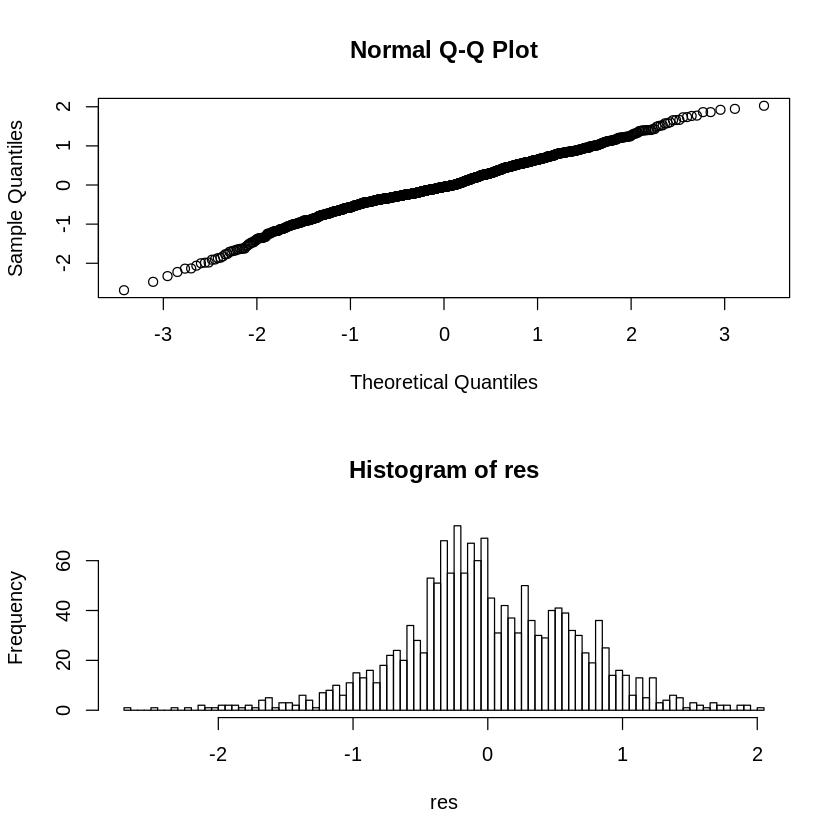

In [18]:
par(mfrow = c(2, 1))
qqnorm(res)
hist(res, breaks = 100)

##### Ahora podemos revisar si en este modelo, existe multicolinealidad entre las variables, esto es de suma importancia puesto que la presencia de colinealidad puese casar inestabilidad en nuestro modelo, además de sobre estimar sus resultados. Existe un método muy bueno llamado "Variance Inflation Factor" el cual nos proporcionará información de cuanta es la varianza que aporta dicha variable

In [19]:
round(vif(modeloRed_I), digits = 3)

fixed.acidity     volatile.acidity          citric.acid 
               7.768                1.789                3.128 
      residual.sugar            chlorides  free.sulfur.dioxide 
               1.703                1.482                1.963 
total.sulfur.dioxide              density                   pH 
               2.187                6.344                3.330 
           sulphates              alcohol 
               1.429                3.031

##### En cierta literatura se plante a que un factor de inflación arriba de 4 merece la pena ser observada y considerada para remover de nuestro modelo, en el método anterior vemos que existen variables con una inflación por encima de lo establecido por lo que son dichas variables que debemos de seguir con cuidado.

#### Podemos comenzar por ejecutar el método de selección de variables tipo "step-wise", éste método realizará una selección inteligente de variables, determinando sacarlas o agregarlas al modelo lineal, el criterio para decidir si las extrae o no, es por medio de una medida de calidad relativa llamada AIC (Criterio de Información de Akaike), éste criterio determina la "penalización" que resulta por extraer o mantener ciertas variables, es un trade-off entre la bondad de ajuste del modelo y la complejidad del mismo modelo, i.e. "se debe perder para ganar". Por lo general éste método seleccionará las variables más significativas, y las menos significativas las quitará de su selección final.
### $$AIC = 2k - 2\ln(L)$$

#### Donde el primer término mide la complejidad (penaliza y evita el sobreajuste) y el segundo mide el ajuste (la devianza). 
- $L$ = el máximo de verosimilitud
- $k$ = el número de parámetros

In [20]:
step(modeloRed_I, direction = 'both')

Start:  AIC=-1375.49
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol

                       Df Sum of Sq    RSS     AIC
- density               1     0.287 666.70 -1376.8
- fixed.acidity         1     0.389 666.80 -1376.5
- residual.sugar        1     0.498 666.91 -1376.3
- citric.acid           1     0.646 667.06 -1375.9
<none>                              666.41 -1375.5
- free.sulfur.dioxide   1     1.694 668.10 -1373.4
- pH                    1     1.957 668.37 -1372.8
- chlorides             1     8.391 674.80 -1357.5
- total.sulfur.dioxide  1     8.427 674.84 -1357.4
- sulphates             1    26.971 693.38 -1314.0
- volatile.acidity      1    33.620 700.03 -1298.8
- alcohol               1    45.672 712.08 -1271.5

Step:  AIC=-1376.8
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + to


Call:
lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + pH + sulphates + alcohol, data = redWineDataSet)

Coefficients:
         (Intercept)      volatile.acidity             chlorides  
            4.430099             -1.012753             -2.017814  
 free.sulfur.dioxide  total.sulfur.dioxide                    pH  
            0.005077             -0.003482             -0.482661  
           sulphates               alcohol  
            0.882665              0.289303  


##### Como pudimos eobservar en el método anterior (stepwise) de selección de variables, el criterio de Akaike penalizó con un valor mínimo de -1380.79 de peso relativo, ahora probaremos el segundo método de selección de variables (backward) y observar sus resultados finales:

In [21]:
step(modeloRed_I, direction = 'backward')

Start:  AIC=-1375.49
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol

                       Df Sum of Sq    RSS     AIC
- density               1     0.287 666.70 -1376.8
- fixed.acidity         1     0.389 666.80 -1376.5
- residual.sugar        1     0.498 666.91 -1376.3
- citric.acid           1     0.646 667.06 -1375.9
<none>                              666.41 -1375.5
- free.sulfur.dioxide   1     1.694 668.10 -1373.4
- pH                    1     1.957 668.37 -1372.8
- chlorides             1     8.391 674.80 -1357.5
- total.sulfur.dioxide  1     8.427 674.84 -1357.4
- sulphates             1    26.971 693.38 -1314.0
- volatile.acidity      1    33.620 700.03 -1298.8
- alcohol               1    45.672 712.08 -1271.5

Step:  AIC=-1376.8
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + to


Call:
lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + pH + sulphates + alcohol, data = redWineDataSet)

Coefficients:
         (Intercept)      volatile.acidity             chlorides  
            4.430099             -1.012753             -2.017814  
 free.sulfur.dioxide  total.sulfur.dioxide                    pH  
            0.005077             -0.003482             -0.482661  
           sulphates               alcohol  
            0.882665              0.289303  


#### Hasta el momento se pudo concluir que en ambos métodos de selección de variables coinciden en las variables elegidas, por lo que procedemos a crear un modelo II con las variables sugeridas por ambos métodos.

#### Esto se determina por medio de nuestra medida de bondad de ajuste AIC (Criterio de Información de Akaike) dicha medida nos penalizará por cada variable que saquemos de nuestro modelo saturado, por lo que se busca que la penalización sea la menor posible, el modelo obtuvo un AIC de -1380.79 (para el método _backwards_) el cual coincide con el AIC de método _step-wise_.

In [22]:
modelo_vacio = lm(quality ~ 1)

In [23]:
step(modelo_vacio, direction = 'forward', scope = formula(modeloRed_I))

Start:  AIC=-682.5
quality ~ 1

                       Df Sum of Sq     RSS      AIC
+ alcohol               1   236.295  805.87 -1091.65
+ volatile.acidity      1   158.967  883.20  -945.14
+ sulphates             1    65.865  976.30  -784.89
+ citric.acid           1    53.405  988.76  -764.61
+ total.sulfur.dioxide  1    35.707 1006.46  -736.24
+ density               1    31.887 1010.28  -730.19
+ chlorides             1    17.318 1024.85  -707.29
+ fixed.acidity         1    16.038 1026.13  -705.29
+ pH                    1     3.473 1038.69  -685.84
+ free.sulfur.dioxide   1     2.674 1039.49  -684.61
<none>                              1042.17  -682.50
+ residual.sugar        1     0.197 1041.97  -680.80

Step:  AIC=-1091.65
quality ~ alcohol

                       Df Sum of Sq    RSS     AIC
+ volatile.acidity      1    94.074 711.80 -1288.1
+ sulphates             1    44.977 760.89 -1181.5
+ citric.acid           1    31.953 773.92 -1154.3
+ pH                    1    26.362


Call:
lm(formula = quality ~ alcohol + volatile.acidity + sulphates + 
    total.sulfur.dioxide + chlorides + pH + free.sulfur.dioxide)

Coefficients:
         (Intercept)               alcohol      volatile.acidity  
            4.430099              0.289303             -1.012753  
           sulphates  total.sulfur.dioxide             chlorides  
            0.882665             -0.003482             -2.017814  
                  pH   free.sulfur.dioxide  
           -0.482661              0.005077  


#### Para el último método de selección de variables (forward) concluimos que el mejor modelo es el mismo en los tres casos, con un mismo AIC como resultado.

In [24]:
modeloRed_II = lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
                  total.sulfur.dioxide + pH + sulphates + alcohol, data = redWineDataSet)

In [25]:
summary(modeloRed_II)


Call:
lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + pH + sulphates + alcohol, data = redWineDataSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68918 -0.36757 -0.04653  0.46081  2.02954 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.4300987  0.4029168  10.995  < 2e-16 ***
volatile.acidity     -1.0127527  0.1008429 -10.043  < 2e-16 ***
chlorides            -2.0178138  0.3975417  -5.076 4.31e-07 ***
free.sulfur.dioxide   0.0050774  0.0021255   2.389    0.017 *  
total.sulfur.dioxide -0.0034822  0.0006868  -5.070 4.43e-07 ***
pH                   -0.4826614  0.1175581  -4.106 4.23e-05 ***
sulphates             0.8826651  0.1099084   8.031 1.86e-15 ***
alcohol               0.2893028  0.0167958  17.225  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6477 on 1591 degrees of freedom
Multiple R-squared

#### Este nuevo modelo presenta una baja en nuestro _error estandar residual_, esto es bueno pues representa la desviación estándar de los residuales, por lo tanto buscamos que esta medida de bondad de ajuste sea lo más cercana a 0 posible, esto quiere decir que el modelo se explica mejor con la poca aleatoriedad en sus variables por lo que genera residuales muy ajustados a los datos, entre más alejada esté de 0, mayor será la influencia de aleatoriedad en nuestro modelo, por lo que no tendrá mucho sentido describir el fenómeno en esas condiciones azarosas.

#### El error estandar residual del modelo I fue de 0.648, a diferencia del error estándar residual del modelo II de 0.6477 por lo que concluimos que el ajuste de los residuales a los datos es mejor en el modelo II.

#### Nota curiosa: parecería que el modelo II es poco mejor que el modelo I, pero si nos dejamos guiar por el _coeficiente de determinación_ (R_cuadrada) podríamos asumir que el modelo I es mejor que el II, sin embargo no olvidemos que dicho coeficiente puede mejorar por el simple hecho de que existan más variablas en nuestro modelo, variables que podrían ser poco significativas, y eso no determina un mejor modelo, sino simplemente ruido a las variables.

#### Volví a realizar la prueba de hipótesis de normalidad a los residuos obtenidos en el modelo II, el resultado sigue diciéndonos que los residuos no provienen de una distribución normal.

In [26]:
res_II = residuals(modeloRed_II)

In [32]:
dplot <- density(res_II)

In [28]:
norm_II = pnorm(res_II, mean = mean(res_II), sd = sd(res_II))

In [29]:
(testAD_II <- ad.test(norm_II))


	Anderson-Darling normality test

data:  norm_II
A = 16.674, p-value < 2.2e-16


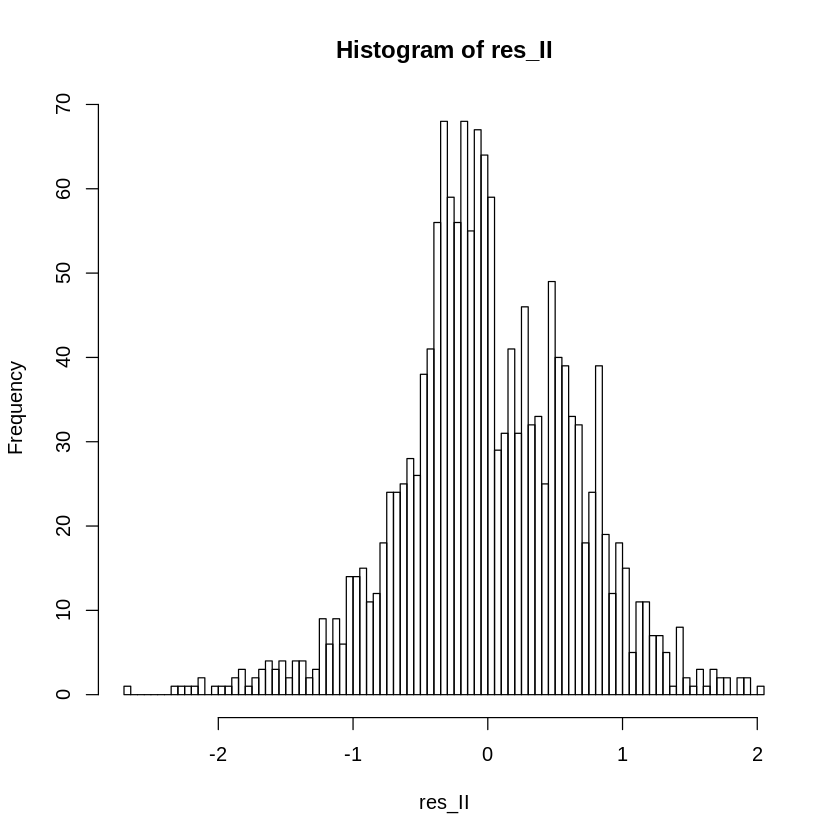

In [30]:
hist(res_II, breaks = 100)

##### El factor de inflación de la varianza nos indica que tan alta es la multicolinealidad, i.e. que tan alta es la correlación entre las variables explicativas en nuestro modelo, se considera que un VIF > 10 es una multicolinealidad alta y/o moderada, asumimos que en la vida real todos los fenómenos analizados contienen variables correlacionadas, sin embargo buscamos que ésta sea la menor posible. Conclusión, no existe multicolinealidad entre las variables endógenas de éste nuevo modelo II.
##### Por lo revisado, la varieble total.sulfur.dioxide recibe un AIC de -1357.2 por lo que es menor que se recibiría por remover la variable free.sulfur.dioxide. Además es la que más variabilidad aporta de las dos, con un factor de 1.944

In [33]:
round(vif(modeloRed_II), digits = 3)

volatile.acidity            chlorides  free.sulfur.dioxide 
               1.242                1.333                1.883 
total.sulfur.dioxide                   pH            sulphates 
               1.944                1.255                1.322 
             alcohol 
               1.220

In [36]:
cooksDistanceModel_II <- cooks.distance(modeloRed_II)

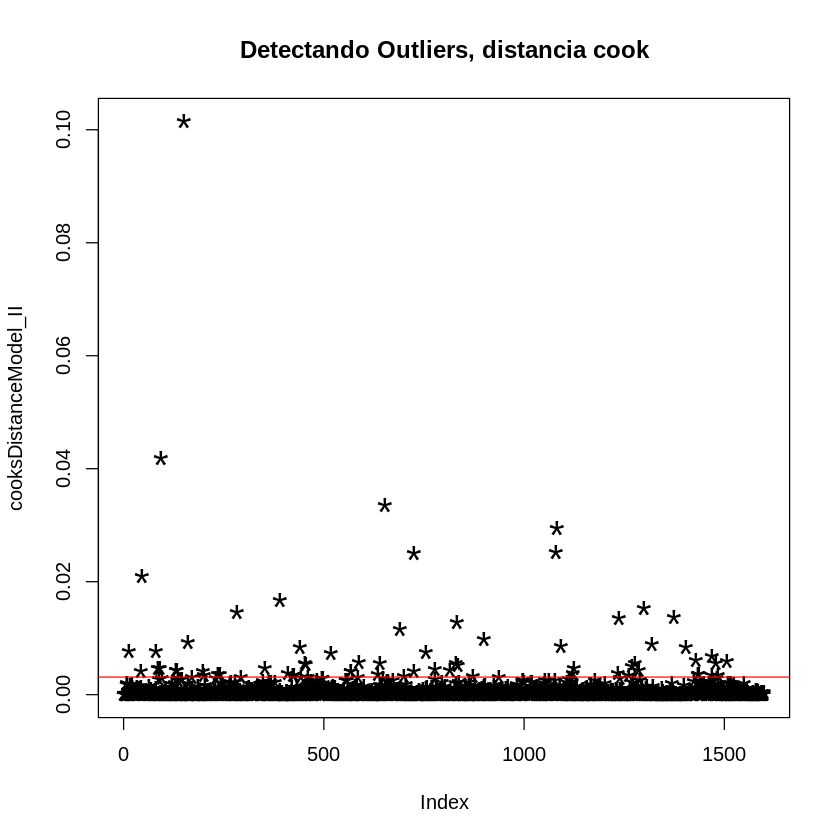

In [37]:
plot(cooksDistanceModel_II, pch = '*', cex = 2, main = 'Detectando Outliers, distancia cook')
abline(h = 4*mean(cooksDistanceModel_II, na.rm = T), col = 'red')

##### Ahora veremos el nivel de apalancamiento (_leverage_) que pueden tener influencia en el comportamiento de nuestros datos debido a los outliers presentes. Se generarán 2 reglas (por literatura)
- Sea mayor a 2 veces su media_m
- Sea mayor a 3 veces (multiplicacion) su media_m

In [38]:
lev_m = hatvalues(modeloRed_II)
(media_m = ncol(redWineDataSet) / nrow(redWineDataSet))

[1] 0.00750469

In [39]:
lev_m[lev_m > 2*media_m]

14         18         20         43         46         82         84 
0.02649867 0.02457702 0.02024278 0.01984177 0.01677072 0.04276769 0.02913116 
        87         92         93         96        107        127        128 
0.05258018 0.05258018 0.05469173 0.01705297 0.04329407 0.01538208 0.01535989 
       152        170        227        259        282        292        340 
0.09114827 0.03209751 0.02940016 0.08326896 0.02616942 0.02981896 0.01567473 
       397        401        452        615        640        653        673 
0.01944480 0.01944480 0.03252284 0.02362525 0.01544483 0.01961045 0.01897158 
       693        724        731        755        796       1018       1019 
0.03264648 0.03441434 0.03141517 0.03191575 0.01654475 0.01874926 0.01874926 
      1052       1080       1082       1132       1166       1245       1261 
0.03249702 0.05280824 0.05765994 0.01562273 0.02373306 0.02084093 0.02919466 
      1300       1320       1371       1373       1435       1436       1559 
0.02602228 0.03424767 0.03261847 0.03261847 0.01608074 0.01608074 0.02604554

In [40]:
lev_m[lev_m > 3*media_m]

14         18         82         84         87         92         93 
0.02649867 0.02457702 0.04276769 0.02913116 0.05258018 0.05258018 0.05469173 
       107        152        170        227        259        282        292 
0.04329407 0.09114827 0.03209751 0.02940016 0.08326896 0.02616942 0.02981896 
       452        615        693        724        731        755       1052 
0.03252284 0.02362525 0.03264648 0.03441434 0.03141517 0.03191575 0.03249702 
      1080       1082       1166       1261       1300       1320       1371 
0.05280824 0.05765994 0.02373306 0.02919466 0.02602228 0.03424767 0.03261847 
      1373       1559 
0.03261847 0.02604554

##### Se reachaza Hipótesis nula, pues existe autocorrelación positiva en los residuales. El test de Durbin Watson prueba la existencia de autocorrelación en los residuales, el p-valor puede toma valores de [0, 4] donde 0 a menos de 2 indica una autocorrelación positiva, 2 indica no autocorrelación, y más de 2 a 4 una autocorrelación negativa. Sin embargo esto no es tan anormal, pues como mencionamos arriba, las variables del fenómeno siempre estarán autocorrelacionadas, el tema es saber qué tan correlacionadas. De momento no hay que preocuparse, pues el D-W Statistic tiene un valor de 1.749967, y la regla de oro indica que los valores estadísticos de prueba en el rango de 1.5 a 2.5 son relativamente normales.

##### Aquí solo corroboramos la existencia de la autocorrelación entre los factores, dado que la hipótesis nula plantea la no autocorrelación, y nuestro p-value fue de 0, por lo que rechazamos $H_0$ y damos pie a pensar que existe autocorrelación entre las variables, i.e. que nuestra rho es distinta de 0, donde 0 implica independencia, y distinto de 0 implica dependencia.

In [41]:
durbinWatsonTest(modeloRed_II, method = c('resample','normal'), alternative = c('two.sided','positive','negative'))

 lag Autocorrelation D-W Statistic p-value
   1       0.1250136      1.749967       0
 Alternative hypothesis: rho != 0

##### En esta prueba (Breusch-Pagan) obtuvimos un p-valor menor que nuestro nivel de significancia de 0.05, por lo tanto, podemos rechazar la hipótesis nula de que la varianza de los residuos es constante e inferir que la heteroscedasticidad está realmente presente, confirmando así nuestra inferencia gráfica. 
##### La hipótesis nula de la prueba de Breusch-Pagan plantea la hipotesis de que existe Homocedasticidad, por lo tanto si nuestro p-valor es menor que $\alpha = 0.05$ entonces rechazamos hipotesis nula y damos pie a pensar que la hipotesis alternativa no es tan descabellada, i.e. que existe Heterocedasticidad.

In [42]:
bptest(modeloRed_II, studentize = TRUE)


	studentized Breusch-Pagan test

data:  modeloRed_II
BP = 54.816, df = 7, p-value = 1.622e-09


##### Además pude realizar una prueba de Varianza no constante, es decir, heterocedasticidad, esta prueba plantea una hipótesis nula que la varianza de los residuales son constantes y finitas, sin embargo su hipótesis alternativa plantea lo contrario, por lo que rechazamos la hipótesis nula, de varianza constante y damos pie para comprender que en nuestro modelo aún existe heterocedasticidad.

In [43]:
ncvTest(modeloRed_II)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 20.10007    Df = 1     p = 7.34939e-06 

##### Bien lo mencionaba el método anterior del factor de inflación de la varianza, las variables que se notaron por encima > 4 fueron removidas, existen todavía algunas variables que han mostrado a lo largo del análisis alta correlación, dos variables en particular:
- total.sulfur.dioxide
- free.sulfur.dioxide

##### Ambas poseen una correlación de 0.67, donde la prueba de correlación de Pearson obtuvo 0 de p-value, esto quiere decir que efectivamente existe correlación entre variables, dado el planteamiento de la hipótesis nula de dicha prueba, tenemos que revisar si podemos obtener mejores resultados removiendo alguna de las dos, para ello nos guiaremos por nuestro Criterio de Información de Akaike el nivel de penalización que recibe el modelo si removemos cualquiera de las dos variables, y optar por la menor penalización posible.

##### Veremos si removiendo dicha variable (total.sulfur.dioxide) en un nuevo modelo existe una mejora significativa en la precisión del modelo.

In [48]:
modeloRed_III = lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
                   pH + sulphates + alcohol, data = redWineDataSet)

In [49]:
summary(modeloRed_III)


Call:
lm(formula = quality ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
    pH + sulphates + alcohol, data = redWineDataSet)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5659 -0.3619 -0.0554  0.4684  1.9577 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.008570   0.397294  10.090  < 2e-16 ***
volatile.acidity    -1.073557   0.100901 -10.640  < 2e-16 ***
chlorides           -1.937037   0.400293  -4.839 1.43e-06 ***
free.sulfur.dioxide -0.002215   0.001577  -1.405 0.160318    
pH                  -0.400218   0.117328  -3.411 0.000663 ***
sulphates            0.858467   0.110654   7.758 1.53e-14 ***
alcohol              0.303067   0.016703  18.144  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6528 on 1592 degrees of freedom
Multiple R-squared:  0.3491,	Adjusted R-squared:  0.3467 
F-statistic: 142.3 on 6 and 1592 DF,  p-value: < 2.2e-16


##### El efecto que observamos en este nuevo modelo III es que no implicaba una mejora en la precisión de nuestro modelo, basándonos en el resultado del error estandar residual no hay mejorado, en realidad ha incrementado su nivel y eso no es tan bueno (no lo queremos) por lo que debemos descartar este modelo III propuesto, por lo que podemos concluir que no siempre las variables que muestran tener correlación alta son variables que no sean utiles para el modelo, ya que podrían estar (en combinación) explicando un comportamiento dentro del fenómeno, por lo que en realidad es el complemento de la variable y sin ella no puede explicar de forma más precisa el modelo. 

In [44]:
unique(redWineDataSet$quality, incomparables = FALSE)

[1] 5 6 7 4 8 3

##### Ahora, regresando al modelo II, podemos continuar aplicando una transformación matemática box-cox para aproximarla a una distribución normal, si embargo quality NO es una variable continua, por lo que debemos considerar cambiar la forma de modelar este problema, ya que la variable contiene datos categóricos y ordinales, puesto que son calificaciones de vinos según la mezcla de sus demás variables.
##### Lo que realizaré será una pequeña transformación a los datos, transformación de boxcox para reducir el comportamiento no normalizado dentro de la distribución que siguen los residuales, sin embargo trataré con otro tipo de modelo para resolver mi problema.

##### La transformación boxcox tiene esta forma:
### $$ y(\lambda) = \begin{cases} n/2 & \quad \text{if } n \text{ is even}\\\log{y} \text{ if} \lambda \text{ is odd}\end{cases}$$

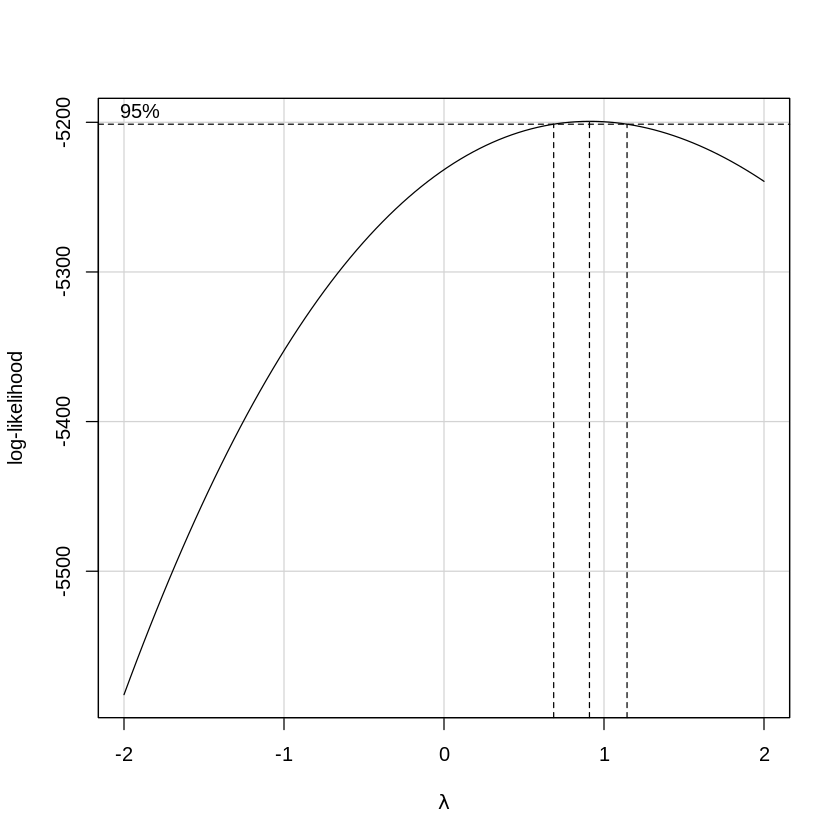

In [56]:
vectorLambdas_II = boxCox(modeloRed_II)

##### Una vez computada la máxima verosimilitud, que podrá maximizar nuestra función de distribución, tenemos que encontrar el máximo dentro de todo un vector que genera de verosimilitudes, por esa razón se realiza una busqueda con la función wich.max(), nuestro máximo verosimil es de 0.909 el cual será usado para maximizar nuestra función, y aplicar una transofrmación a la variable dependiente "quality", ésta a su vez será intricucida a un nuevo modelo.
##### Para este ejercicio de transformacón he decidido usar la versión de transformación modular de boxcox para tratar valores de $y$ en negativos

In [57]:
(lambda_ <- round(vectorLambdas_II$x[which.max(vectorLambdas_II$y)], digits = 3))

[1] 0.909

In [58]:
quality_2 = (quality^lambda_ - 1) / lambda_

##### Lo que podemos notar con estos resultados es:
- Existe una mejora sustancial en nuestro error cuadratico residual, recordando que dicha medida esperemos que con el paso de los arreglos a nuestro modelo, éste se vay tendiendo a cero, por lo que todo pinta bonito, pues ha bajado de 0.6477 modelo II a este nuevo modelo IV 0.5539 con los datos transformados.
- Aun y cuando exista ya la transformación en los residuales y al crear un nuevo modelo, éste no pinta muy bien en las pruebas de hipótesis para normalidad y para heterocedasticidad, pues siguen no pasando las pruebas.

In [60]:
modeloRed_IV = lm(formula = quality_2 ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
                  total.sulfur.dioxide + pH + sulphates + alcohol, data = redWineDataSet)

In [61]:
summary(modeloRed_IV)


Call:
lm(formula = quality_2 ~ volatile.acidity + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + pH + sulphates + alcohol, data = redWineDataSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.35317 -0.30857 -0.03757  0.39607  1.70889 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.1734581  0.3445198   9.211  < 2e-16 ***
volatile.acidity     -0.8701214  0.0862272 -10.091  < 2e-16 ***
chlorides            -1.7241841  0.3399238  -5.072 4.39e-07 ***
free.sulfur.dioxide   0.0043587  0.0018175   2.398   0.0166 *  
total.sulfur.dioxide -0.0029605  0.0005872  -5.041 5.15e-07 ***
pH                   -0.4109197  0.1005197  -4.088 4.57e-05 ***
sulphates             0.7519267  0.0939788   8.001 2.36e-15 ***
alcohol               0.2459555  0.0143615  17.126  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5539 on 1591 degrees of freedom
Multiple R-squar

#### Comprobamos heterocedasticidad en los residuales, i.e. varianza constante y finita. La cual aún no existe, por lo que concluimos que existe Heterocedasticidad, dada la hipótesis nula la cual está diseñada para comprobar homocedasticidad, y ya que heterocedasticidad es lo contrario de homocedasticidad, y nuestra $\alpha = 0.05$ podemos rechazar por completo la existencia de la homocedasticidad, y eso derá pie a pensar que existe heterocedasticidad. 

In [64]:
bptest(modeloRed_IV, studentize = TRUE)


	studentized Breusch-Pagan test

data:  modeloRed_IV
BP = 52.534, df = 7, p-value = 4.582e-09


##### Ahora comprobaremos la existencia de normalidad en los residuales, por lo que la prueba aún y cuando se hayan transformado los datos; no ha pasado.

In [65]:
res_III = residuals(modeloRed_IV)

In [66]:
dplot_III <- density(res_III)

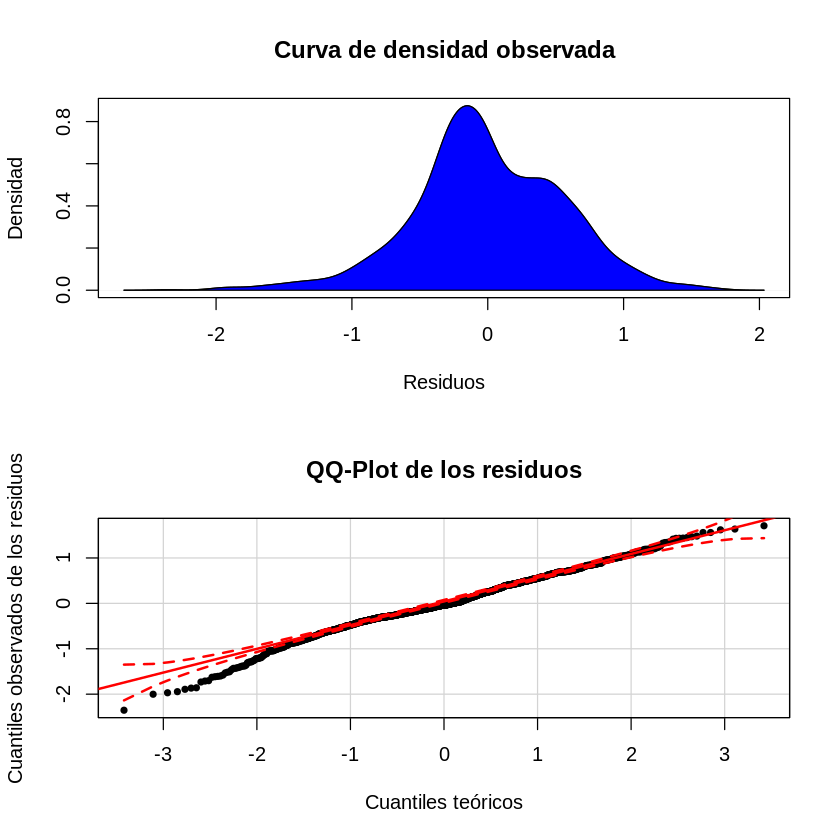

In [67]:
par(mfrow = c(2,1))
plot(dplot_III, #Graficando el objeto dplot
      main = "Curva de densidad observada", #Título principal de la gráfica
      xlab = "Residuos", #Etiqueta del eje x
      ylab = "Densidad") #Etiqueta del eje y

polygon(dplot_III, #Añadiendo el poligono
        col = "blue", #Definiendo el color del poligono
        border = "black")

qqPlot(res_III, #Un gráfico Cuantil-Cuantil de los residuos
       pch = 20, #Forma de los puntos
       main = "QQ-Plot de los residuos", #Título principal
       xlab = "Cuantiles teóricos",  #Etiqueta eje x
       ylab = "Cuantiles observados de los residuos") #Etiqueta eje y

mtext(side = 3, at = par("usr")[1], adj = 0.7, cex = 0.6, col = "gray40", line = -21, #Posición del texto
      text = paste("Francisco Pec --", #Texto
                 format(Sys.time(), 
                "%d/%m/%Y %H:%M:%S --"), #Fecha y Hora
                 R.version.string)) #Versión de R

##### En ambos casos de test de normalidad de Shapiro-Wilk y Anderson-Darling, las hipotesis planteadas son las siguientes:
- $H_0:$ los residuos de la variable quality se distribuyen normal con media cero y varianza constante $N ~ (0,1)$
- $H_a:$ los residuos de la variable queality no se distribuyen normal

##### Por lo que concluimos con fuerza que los residuales no se distribuyen normal rechzando la $H_0$ postulada

In [68]:
norm_III = pnorm(res_III, mean = mean(res_III), sd = sd(res_III))

In [69]:
(testAD_III <- ad.test(norm_III))


	Anderson-Darling normality test

data:  norm_III
A = 16.553, p-value < 2.2e-16


In [70]:
shapiro.test(residuals(modeloRed_IV))


	Shapiro-Wilk normality test

data:  residuals(modeloRed_IV)
W = 0.99036, p-value = 8.854e-09


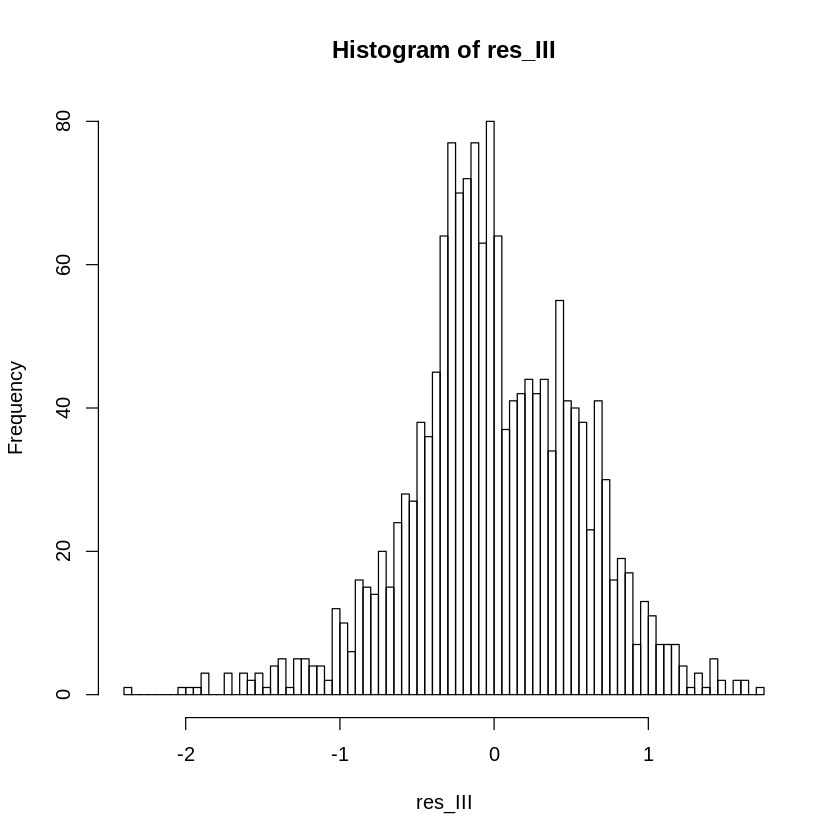

In [74]:
hist(res_III, breaks = 100)

##### En relación a la multicolinealidad se ve estable, pues no ha cambiado en absoluto entre el modelo II y el modelo IV

In [75]:
round(vif(modeloRed_IV), digits = 3)

volatile.acidity            chlorides  free.sulfur.dioxide 
               1.242                1.333                1.883 
total.sulfur.dioxide                   pH            sulphates 
               1.944                1.255                1.322 
             alcohol 
               1.220

#### Por último podemos realizar Durbin-Watson test para verificar autocorrelación $\rho = 0$
#### Concluyendo que aún existe dependencia entre las variables independientes.

In [76]:
durbinWatsonTest(modeloRed_IV, method = c('resample','normal'), alternative = c('two.sided','positive','negative'))

 lag Autocorrelation D-W Statistic p-value
   1       0.1244275       1.75114       0
 Alternative hypothesis: rho != 0

### En conclusión, los datos que hemos analizado no se pueden modelar desde una perspectiva netamente lineal, ya que además, no cumple con muchos supuestos y esto ya es un punto critico, por lo que realizaré en otro notebook el segundo modelo a proponer, un modelo que describa las probabilidades proporcionales que puede tener cada clase (categoria) en salir mejor o peor calificado, aprovechando que la variable "quality" es una variables categórica ordinal. Es posible verlo como un modelo lineal si lo queremos ver de este modo, sin embargo sería aferrarnos a un modelo con precisiones muy bajas y forzadas, por lo que había decidido cambiar de tipo de modelo y observar su comportamiento.